In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Exercise 1

#### Write python code which takes as input the number of trials N (i.e., coins that are being flipped) and the number of successes x (out of N), and reports the observed probability: P(N,x) for a coin flip (assuming p (heads or tails) = 0.5). DO NOT USE the binomial formula. Instead, use the frequentist technique of averaging over a large set of M realizations from a random variable. Hint: see the examples in the jupyter notebook ​StatisticsPart1​.

#### a. Plot the outcome. How will you average over a large set of M realizations? How large does Mneed need to be?

Observed probability = [2.00000e-06 2.20000e-05 1.74000e-04 1.10400e-03 4.53400e-03 1.49100e-02
 3.73740e-02 7.35480e-02 1.19636e-01 1.60430e-01 1.76250e-01 1.59978e-01
 1.19658e-01 7.39240e-02 3.72280e-02 1.50200e-02 4.94400e-03 1.08800e-03
 1.60000e-04 1.60000e-05 0.00000e+00]


Text(0.5, 1.0, ' Probability Bar Graph of Flipping Heads')

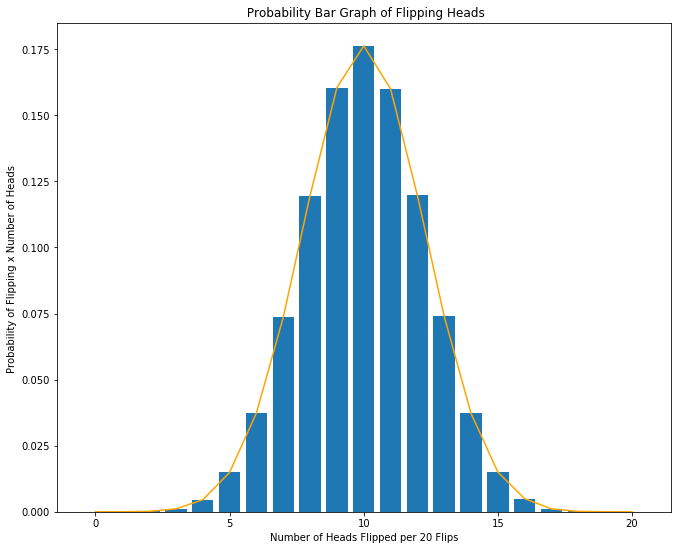

In [26]:
M=20 # Number of coins being flipped
N=500000 # Number of trials
counts = np.zeros(M+1) 

for i in range(0,N):
        draw = np.random.randint(2, size=M)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
print('Observed probability =', counts/N)
w=counts/N ##Average of M realizations, observed probability
plt.bar(np.arange(M+1), w) # Generates bar graph
plt.plot(np.arange(M+1), w, color="orange") # Generates orange line
plt.xlabel("Number of Heads Flipped per 20 Flips")
plt.ylabel("Probability of Flipping x Number of Heads ")
plt.title(" Probability Bar Graph of Flipping Heads")

#### b. Define your variables. What are are the inputs? What are you going to return? What intermediate variables do you need that you will not return?

#### c. How will you fill these variables? What functions/procedures do you need?

#### d. Use your code to make a histogram of P(20,x), where x goes from 0 to 20.  Where is the peakof your distribution? Is this what you expected?



#### e. Overplot the analytic prediction of P(20,x) using the binomial probability formula. ​ You should include a derivation of the binomial probability distribution in the theory section of your write-up.  ​Check the formula you use for the binomial distribution with the one presented inclass.  Write down how you numerically calculated the analytical prediction.

[4.76837158e-07 1.00135803e-05 1.00135803e-04 6.34193420e-04
 2.85387039e-03 9.70315933e-03 2.58750916e-02 5.54466248e-02
 9.70315933e-02 1.40156746e-01 1.68188095e-01 1.68188095e-01
 1.40156746e-01 9.70315933e-02 5.54466248e-02 2.58750916e-02
 9.70315933e-03 2.85387039e-03 6.34193420e-04 1.00135803e-04
 1.00135803e-05 4.76837158e-07]


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


Text(0.5, 1.0, ' Probability Bar Graph of Flipping Heads')

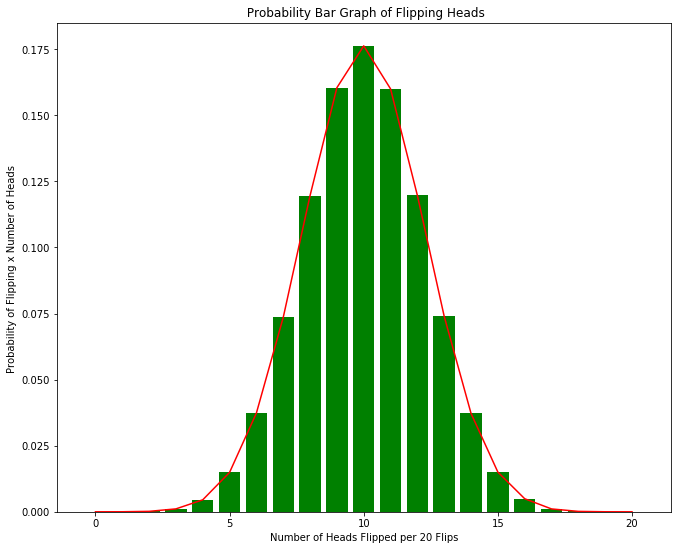

In [27]:
from scipy.misc import factorial
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(M+1))
plt.bar(np.arange(M+1), w, color="green")
plt.plot(np.arange(M+1), w,color="red")
plt.xlabel("Number of Heads Flipped per 20 Flips")
plt.ylabel("Probability of Flipping x Number of Heads ")
plt.title(" Probability Bar Graph of Flipping Heads")

#### f. The expectation value for x is defined as E(x) = ∑xP(x) from 0 to N. 

In [56]:
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
E1=0
W1=1
M1=20
for i in range(0,M1):  
    draw = np.random.randint(2, size=W1)
    heads_count = len(draw[(np.where(draw == 1))])
    E1 += heads_count
print( "The Expectation value for this distribution is approximately",E1)

E2=0
W2=1
M2=40

for i in range(0,M2):  
    draw = np.random.randint(2, size=W2)
    heads_count = len(draw[(np.where(draw == 1))])
    E2+=heads_count
print("The Expectation value for this distribution is approximately",E2)

The Expectation value for this distribution is approximately 11
The Expectation value for this distribution is approximately 19


## Exercise 2 


a. In the limit of small p, we can derive the Poisson probability distribution function from thebinomial PDF.  Please show in the Theory section of your report that for p<<1, the binomialtheorem can be simplified:   where .(N,)λe/x!Px=x−λNpλ=Here are some ideas on how to do this (DON’T use Wikipedia, as it may be confusing):
(1) Rewrite parts of P(N,n) after taking the natural logarithm.
(2) Apply rules associated with natural logs  (,n(x)ln(x),ln(1)forx<)ly=y−x~−x<1
(3) Utilize Stirling’s Approximation for ln(N!) (Wikipedia is ok).  Stirling's approximation shouldget rid of *most* of the factorials.  Use the version free of the symbol π and any exponentials.Keep in mind that the answer (which you have) has n! and p^n in it.(
4) Take care to justify the approximations you use (some approximations work because thingsare small and others because things are big).
(5) Some of the terms can be neglected because they are small relative to others.
(6) At the end, invert back from the natural log by taking exponential of your result. Collect termsin the form requested.

b. Re-write your code for the experimental binomial probability to allow for a variable probability of success. Now plot the histogram of P(100,x) for small p.

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, ' Probability Bar Graph of Flipping Heads')

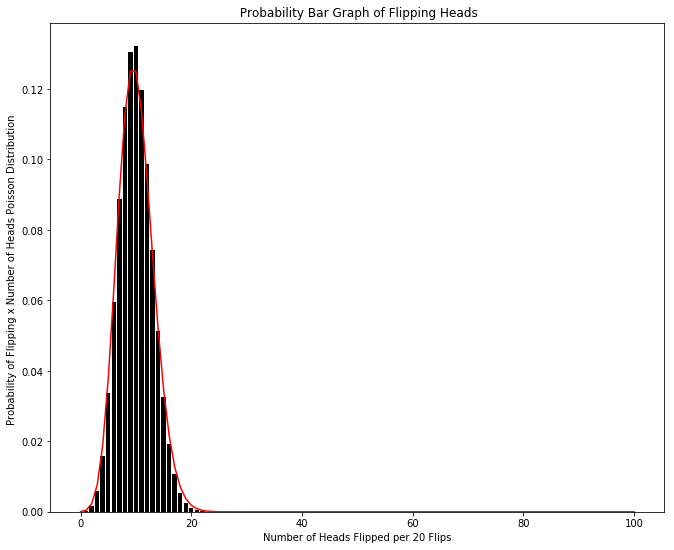

In [24]:
from scipy.misc import factorial
N=900000
M= 100
p = .1
counts = np.zeros(M+1) 
for i in range(0,N):
        draw = np.random.uniform(0,1, size=M)
        heads_count = len(draw[(np.where(draw <= p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1
r=counts/N
def PTx(M):
    l=M*p
    x = (np.arange(M+1))
    PTx = ((l)**x)/(np.exp(l)*factorial(x))
    return PTx

plt.bar(np.arange(M+1), r, color="black")
plt.plot(np.arange(M+1), PTx(M),color="red")
plt.xlabel("Number of Heads Flipped per 20 Flips")
plt.ylabel("Probability of Flipping x Number of Heads Poisson Distribution ")
plt.title(" Probability Bar Graph of Flipping Heads")

c. Compare your empirical histogram to the exact prediction using the analytic binomialprobability distribution. Also compare your histogram to the prediction of the analytic Poissondistribution for small p. Write down how you numerically determined these.d. Prove in the Theory section the following:ar(x)(x<>V=<−x>)2>=<x2>−<x2Numerically calculate the variance of the Poisson distribution using your empirical results of thesimulation with small p.  How do you calculate numerically the expectation value of the firstterm?  The second term?  Use a variation of the code used in (1f).   Now compare the values ofVar(x) and mean(x) for a given value of p.  Is this what you expected?  Plot different pairs ofVar(x) and mean(x) for various values of p where the approximation that led to the binomialdistribution converging to the Poisson distribution is still valid.  Is this what you expected?